In [4]:
import tensorflow
print(tensorflow.__version__) ######### Note:- we required tensorflow 1.X to use tflearn library

1.15.2


In [6]:
########## Ignoring the warnings ##################
import warnings
warnings.filterwarnings("ignore")
######### Importing necessary libraries to built LeNet Model ########################
import keras

from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten,Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.models import load_model
from keras.metrics import categorical_crossentropy
from keras.optimizers import Adam , SGD

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1000)

In [0]:
!pip install tflearn ## If not installed in your system

**Note:-** If you are using Tensorflow 2.x tflearn will not work
so it means use Tensorflow 1.x for tflearn usage

In [8]:
################# Geting Data ###################3
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)

In [11]:
print('x shape',(x).shape)
print('y shape',(y).shape)
print('classes',(y[1].shape))

x shape (1360, 224, 224, 3)
y shape (1360, 17)
classes (17,)


In [12]:
classes=list(y[1].shape)[0]
classes

17

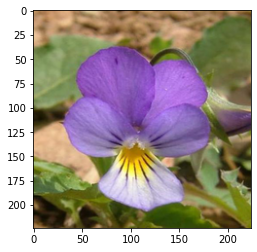

In [10]:
plt.imshow(x[5])

Note:- By default in any conv or pooling layer padding='valid', which means no padding, if you want to provide padding then use "causal" or "same" (It does zero padding)

**1) Orignal AlexNet**

In [11]:
########### Creating sequential model of Orignal AlexNet ##########################
#Instantiate an empty model
model = Sequential()

# Block1
# C1 Convolutional Layer ######## As we know that our dataset images size is (224,224,3), so we considering the same
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224,224,3)))
# P1 Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# B1 Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# Block2
# C2 Convolutional Layer 
model.add(Conv2D(256, kernel_size=(11, 11), strides=(1, 1), activation='relu'))
# P2 Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# B2 Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# Block3
# C3 Convolutional Layer 
model.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
# B3 Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# Block4
# C4 Convolutional Layer 
model.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
# B4 Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# Block5
# C5 Convolutional Layer 
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
# P3 Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# B5 Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Flatten())

# Block6
# D1 Dense Layer
model.add(Dense(4096, input_shape=(224,224,3),activation='relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Block7
# D2 Dense Layer
model.add(Dense(4096,activation='relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Block8
# D3 Dense Layer
model.add(Dense(1000,activation='relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

#Output Layer with softmax activation
model.add(Dense(classes, activation='softmax'))

# Compile the model
model.compile(optimizer=SGD(),loss=categorical_crossentropy,metrics=['accuracy'])

# Model Summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024      
______________________________________

In [0]:
######### Model Train ###############3
history=model.fit(x, y, batch_size=64, epochs=100, verbose=2,validation_split=0.2, shuffle=True)

Train on 1088 samples, validate on 272 samples
Epoch 1/100
 - 1s - loss: 2.2647e-04 - accuracy: 1.0000 - val_loss: 1.7776 - val_accuracy: 0.6434
Epoch 2/100
 - 1s - loss: 2.3650e-04 - accuracy: 1.0000 - val_loss: 1.7770 - val_accuracy: 0.6434
Epoch 3/100
 - 1s - loss: 2.4147e-04 - accuracy: 1.0000 - val_loss: 1.7787 - val_accuracy: 0.6471
Epoch 4/100
 - 1s - loss: 1.8370e-04 - accuracy: 1.0000 - val_loss: 1.7765 - val_accuracy: 0.6507
Epoch 5/100
 - 1s - loss: 2.4377e-04 - accuracy: 1.0000 - val_loss: 1.7723 - val_accuracy: 0.6507
Epoch 6/100
 - 1s - loss: 2.5886e-04 - accuracy: 1.0000 - val_loss: 1.7725 - val_accuracy: 0.6471
Epoch 7/100
 - 1s - loss: 2.0509e-04 - accuracy: 1.0000 - val_loss: 1.7747 - val_accuracy: 0.6471
Epoch 8/100
 - 1s - loss: 4.3670e-04 - accuracy: 1.0000 - val_loss: 1.7830 - val_accuracy: 0.6434
Epoch 9/100
 - 1s - loss: 1.9670e-04 - accuracy: 1.0000 - val_loss: 1.7769 - val_accuracy: 0.6507
Epoch 10/100
 - 1s - loss: 4.0326e-04 - accuracy: 1.0000 - val_loss: 1.

In [0]:
model.save("AlexNet_Basicmodel100.h5")

In [0]:
score = model.evaluate(x, y)
# print('Test Loss:', score[0])
# print('Test accuracy:', score[1])

print("Test loss {:.4f}, accuracy {:.2f}%".format(score[0], score[1] * 100))

1360/1360 [==============================] - 1s 592us/step
Test loss 0.3595, accuracy 92.57%


2) Modified AlexNet

In [0]:
from keras.layers import LeakyReLU

In [14]:
########### Creating sequential model of Modified AlexNet ##########################
#Instantiate an empty model
model2 = Sequential()

# Block1
# C1 Convolutional Layer ######## As we know that our dataset images size is (224,224,3), so we considering the same
model2.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(224,224,3)))
model2.add(Conv2D(64, kernel_size=(3, 3), strides=(2, 2), activation='relu'))
model2.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1)))
model2.add(LeakyReLU(alpha=0.01))
# P1 Pooling Layer
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# B1 Batch Normalisation before passing it to the next layer
model2.add(BatchNormalization())

# Block2
# C2 Convolutional Layer 
model2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1)))
model2.add(LeakyReLU(alpha=0.01))
# P2 Pooling Layer
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# B2 Batch Normalisation before passing it to the next layer
model2.add(BatchNormalization())

# Block3
# C3 Convolutional Layer 
model2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
# B3 Batch Normalisation before passing it to the next layer
model2.add(BatchNormalization())

# Block4
# C4 Convolutional Layer 
model2.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model2.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
# B4 Batch Normalisation before passing it to the next layer
model2.add(BatchNormalization())

# Block5
# C5 Convolutional Layer 
model2.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
# P3 Pooling Layer
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# B5 Batch Normalisation before passing it to the next layer
model2.add(BatchNormalization())

#Flatten the CNN output so that we can connect it with fully connected layers
model2.add(Flatten())

# Block6
# D1 Dense Layer
model2.add(Dense(1024, input_shape=(224,224,3),activation='relu'))
# Add Dropout to prevent overfitting
model2.add(Dropout(0.4))
# Batch Normalisation
model2.add(BatchNormalization())

# Block7
# D2 Dense Layer
model2.add(Dense(1024,activation='relu'))
# Add Dropout
model2.add(Dropout(0.4))
# Batch Normalisation
model2.add(BatchNormalization())

# Block8
# D3 Dense Layer
model2.add(Dense(1000,activation='relu'))
# Add Dropout
model2.add(Dropout(0.4))
# Batch Normalisation
model2.add(BatchNormalization())

#Output Layer with softmax activation
model2.add(Dense(classes, activation='softmax'))

# Compile the model
sgd=SGD(lr=0.01, momentum=0.9)
model2.compile(optimizer=sgd,loss=categorical_crossentropy,metrics=['accuracy'])

# Model Summary
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 110, 110, 64)      36928     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 108, 108, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 128)      

In [15]:
######### Model Train ###############3
history2=model2.fit(x, y, batch_size=64, epochs=100, verbose=2,validation_split=0.2, shuffle=True)




Train on 1088 samples, validate on 272 samples
Epoch 1/100
 - 26s - loss: 3.2634 - accuracy: 0.1149 - val_loss: 16503.0157 - val_accuracy: 0.0772
Epoch 2/100
 - 13s - loss: 2.5461 - accuracy: 0.2445 - val_loss: 5048.2143 - val_accuracy: 0.0809
Epoch 3/100
 - 13s - loss: 2.3652 - accuracy: 0.3070 - val_loss: 626.7699 - val_accuracy: 0.0662
Epoch 4/100
 - 13s - loss: 2.1676 - accuracy: 0.3447 - val_loss: 338.0594 - val_accuracy: 0.0772
Epoch 5/100
 - 13s - loss: 2.0155 - accuracy: 0.3925 - val_loss: 149.1043 - val_accuracy: 0.0625
Epoch 6/100
 - 13s - loss: 1.9614 - accuracy: 0.3787 - val_loss: 84.2782 - val_accuracy: 0.0772
Epoch 7/100
 - 13s - loss: 1.6868 - accuracy: 0.4697 - val_loss: 28.8091 - val_accuracy: 0.0809
Epoch 8/100
 - 13s - loss: 1.5755 - accuracy: 0.4890 - val_loss: 12.1491 - val_accuracy: 0.1250
Epoch 9/100
 - 13s - loss: 1.3909 - accuracy: 0.5469 - val_loss: 13.8893 - val_accuracy: 0.1471
Epoch 10/100
 - 13s - loss: 1.3570 - accuracy: 0.5634 - val_loss: 5.5027 - val

In [17]:
score2 = model2.evaluate(x, y)
# print('Test Loss:', score[0])
# print('Test accuracy:', score[1])

print("Test loss {:.4f}, accuracy {:.2f}%".format(score[0], score[1] * 100))

1360/1360 [==============================] - 6s 4ms/step
Test loss 0.6285, accuracy 90.29%


In [0]:
score=[0.3595,0.9257]

Accuracy improvement in model2 is -2.520522% as compared to model1


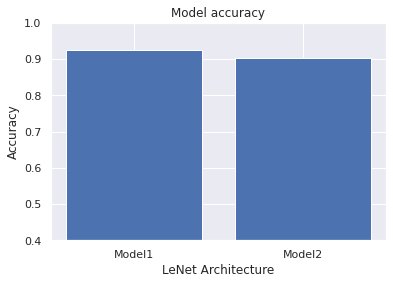

In [25]:
import seaborn as sns
sns.set()
plt.bar(['Model1','Model2'],[score[1],score2[1]])
plt.ylim([0.4, 1])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('AlexNet Architecture')
print("Accuracy improvement in model2 is {:2f}% as compared to model1".format(((score2[1]-score[1])/score2[1])*100))

**3) AlexNet with some modification**

In [13]:
#Instantiate an empty model ##
model3 = Sequential()

# Block1
# C1 Convolutional Layer ######## As we know that our dataset images size is (224,224,3), so we considering the same
model3.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224,224,3)))
# P1 Pooling Layer
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# B1 Batch Normalisation before passing it to the next layer
model3.add(BatchNormalization())

# Block2
# C2 Convolutional Layer 
model3.add(Conv2D(256, kernel_size=(11, 11), strides=(1, 1), activation='relu'))
# P2 Pooling Layer
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# B2 Batch Normalisation before passing it to the next layer
model3.add(BatchNormalization())

# Block3
# C3 Convolutional Layer 
model3.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
# B3 Batch Normalisation before passing it to the next layer
model3.add(BatchNormalization())

# Block4
# C4 Convolutional Layer 
model3.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
# B4 Batch Normalisation before passing it to the next layer
model3.add(BatchNormalization())

# Block5
# C5 Convolutional Layer 
model3.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
# P3 Pooling Layer
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# B5 Batch Normalisation before passing it to the next layer
model3.add(BatchNormalization())

#Flatten the CNN output so that we can connect it with fully connected layers
model3.add(Flatten())

# Block6
# D1 Dense Layer
model3.add(Dense(4096, input_shape=(224,224,3),activation='relu'))
# Add Dropout to prevent overfitting
model3.add(Dropout(0.4))
# Batch Normalisation
model3.add(BatchNormalization())

# Block7
# D2 Dense Layer
model3.add(Dense(4096,activation='relu'))
# Add Dropout
model3.add(Dropout(0.4))
# Batch Normalisation
model3.add(BatchNormalization())

# Block8
# D3 Dense Layer
model3.add(Dense(1000,activation='relu'))
# Add Dropout
model3.add(Dropout(0.4))
# Batch Normalisation
model3.add(BatchNormalization())

#Output Layer with softmax activation
model3.add(Dense(classes, activation='softmax'))

# Compile the model
model3.compile(optimizer=Adam(),loss=categorical_crossentropy,metrics=['accuracy'])

# Model Summary
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 384)        

In [15]:
######### Model Train ###############3
history3=model3.fit(x, y, batch_size=128, epochs=1000, verbose=2,validation_split=0.2, shuffle=True)

Train on 1088 samples, validate on 272 samples
Epoch 1/1000
 - 1s - loss: 0.0689 - accuracy: 0.9807 - val_loss: 5.3883 - val_accuracy: 0.4007
Epoch 2/1000
 - 1s - loss: 0.0549 - accuracy: 0.9816 - val_loss: 5.3367 - val_accuracy: 0.4706
Epoch 3/1000
 - 1s - loss: 0.0539 - accuracy: 0.9853 - val_loss: 5.1428 - val_accuracy: 0.5000
Epoch 4/1000
 - 1s - loss: 0.0454 - accuracy: 0.9844 - val_loss: 4.0862 - val_accuracy: 0.5515
Epoch 5/1000
 - 1s - loss: 0.0524 - accuracy: 0.9789 - val_loss: 4.7811 - val_accuracy: 0.4890
Epoch 6/1000
 - 1s - loss: 0.0601 - accuracy: 0.9862 - val_loss: 3.7844 - val_accuracy: 0.5551
Epoch 7/1000
 - 1s - loss: 0.0693 - accuracy: 0.9779 - val_loss: 3.8430 - val_accuracy: 0.5625
Epoch 8/1000
 - 1s - loss: 0.0418 - accuracy: 0.9853 - val_loss: 4.0646 - val_accuracy: 0.5478
Epoch 9/1000
 - 1s - loss: 0.0324 - accuracy: 0.9871 - val_loss: 4.2481 - val_accuracy: 0.5846
Epoch 10/1000
 - 1s - loss: 0.0512 - accuracy: 0.9835 - val_loss: 3.8451 - val_accuracy: 0.5257
Ep

In [19]:
score=[0.3595,0.9257]
score2=[0.6285,0.9029]
score3=[0.6481,0.91]
print("Test loss {:.4f}, accuracy {:.2f}".format(score3[0], score3[1]))
# score3 = model3.evaluate(x, y)

Test loss 0.6481, accuracy 0.91


Text(0.5, 0, 'AlexNet Architecture')

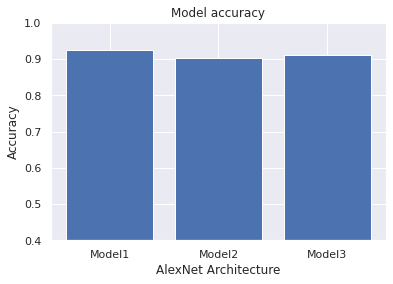

In [20]:
import seaborn as sns
sns.set()
plt.bar(['Model1','Model2','Model3'],[score[1],score2[1],score3[1]])
plt.ylim([0.4, 1])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('AlexNet Architecture')
# print("Accuracy improvement in model2 is {:2f}% as compared to model1".format(((score2[1]-score[1])/score2[1])*100))

**1) Model1 is basic architecture of AlexNet**

**2) Model2 is purely modified generalized model with some similarity of AlexNet**

**3) Model3 is based on AlexNet with changes in optimized and batch size** 

>This above figure shows the accuracy of whole data which almost equivalent, model1 and model3 has run till 1000 epochs, while model2 run till 100 epochs.

>We can try to run our model till we didn't start getting same loss value for various epochs.

>Model1 has stabalized, but model2 and model3 still have chances to learn more.